In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
from utils import *

In [3]:
img_files = glob.glob(os.path.join(IMG_PATH, "*.jpg"))
train_img_files, test_img_files = train_test_split(img_files, test_size=0.5, random_state=1334)

In [4]:
train_features, train_u_values, train_v_values = img_features(img_files)

--- Extracting features for ./Images/07-qU-Eas7FmWM.jpg ---
--- Extracting features for ./Images/04-u49V8vkyhwI.jpg ---
--- Extracting features for ./Images/01-hGm6fp6p6DE.jpg ---
--- Extracting features for ./Images/03-jDD7w5-skco.jpg ---
Calculating centroids
Calculating centroids
Calculating centroids
Calculating centroids
Calculating featuresCalculating featuresCalculating featuresCalculating features



--- Extracting features for ./Images/07-u2mgoe-ulH4.jpg ------ Extracting features for ./Images/05-M97nFjOcXsM.jpg ------ Extracting features for ./Images/01-lC6saPRS9mw.jpg ------ Extracting features for ./Images/03-lD-K7FaBtW8.jpg ---



Calculating centroids
Calculating centroids
Calculating centroids
Calculating centroids
Calculating featuresCalculating featuresCalculating featuresCalculating features



--- Extracting features for ./Images/07-UHapT_mKkak.jpg ------ Extracting features for ./Images/05-vQTBnE9Esi4.jpg ------ Extracting features for ./Images/01-ZPEbsxwh9U0.jpg --

In [6]:
np.unique(train_u_values)

array([-33., -32., -31., -30., -29., -28., -27., -26., -25., -24., -23.,
       -22., -21., -20., -19., -18., -17., -16., -15., -14., -13., -12.,
       -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
         0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  27.,  28.,  29.])

In [7]:
np.unique(train_v_values)

array([-59., -58., -57., -56., -55., -54., -53., -52., -51., -50., -49.,
       -48., -47., -46., -45., -44., -43., -42., -41., -40., -39., -38.,
       -37., -36., -35., -34., -33., -32., -31., -30., -29., -28., -27.,
       -26., -25., -24., -23., -22., -21., -20., -19., -18., -17., -16.,
       -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.])

In [8]:
clf_u, clf_v = get_predictors(train_features, train_u_values, train_v_values)

Fitting second channel values
Fitting third channel values


Calculating centroids
Calculating features


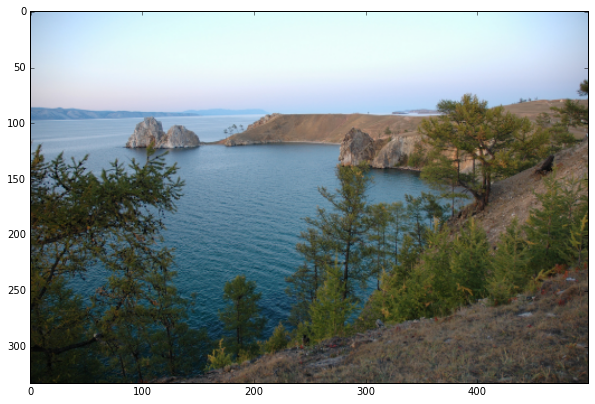

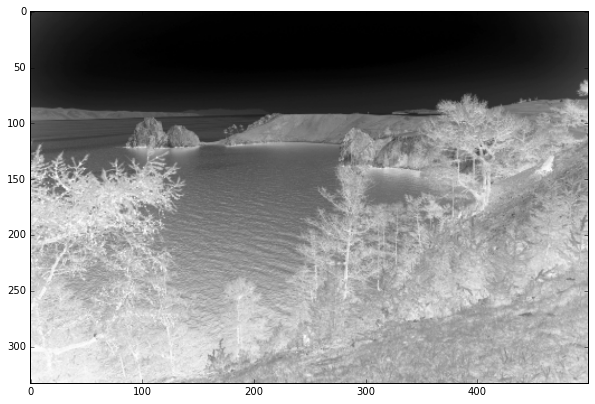

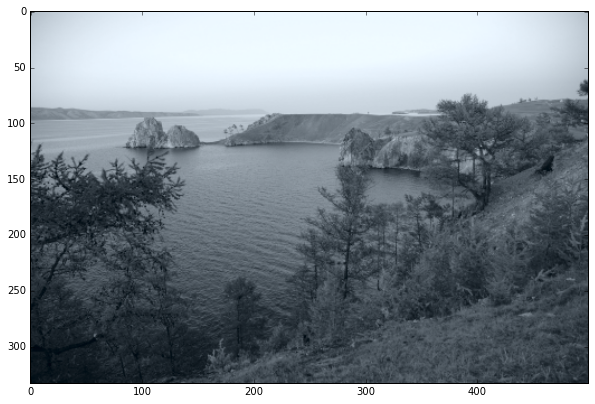

In [9]:
img = imread(test_img_files[10])
scale_factor = min(IMG_HEIGHT/img.shape[0], IMG_WIDTH/img.shape[1])
img = rescale(img, scale_factor)
plt.figure(figsize=FIGSIZE)
plt.imshow(img)
img_grey = rgb2lab(img)[:,:,0]
segments = get_segments(img_grey)
features = extract_features(img_grey, segments)
U_pred, V_pred = clf_u.predict(np.absolute(features)), clf_v.predict(np.absolute(features))
plt.figure(figsize=FIGSIZE)
plt.imshow(img_grey, plt.cm.binary)
# Reconstruct image
img_ = np.zeros((img_grey.shape[0], img_grey.shape[1], 3))
img_[:,:,0] = img_grey
for (i,j), value in np.ndenumerate(segments):
    img_[i][j][1] = U_pred[value]
    img_[i][j][2] = V_pred[value]
plt.figure(figsize=FIGSIZE)
plt.imshow(lab2rgb(img_))

In [10]:
U_pred

array([-1.85100815, -1.85100815, -1.85100815, -1.85100196, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100759, -1.85100764, -1.85100807, -1.85100815, -1.85100056,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100749, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85100815,
       -1.85100815, -1.85100815, -1.85100815, -1.85100815, -1.85

In [11]:
V_pred

array([-6.12722294, -6.12722294, -6.12722294, -6.12722913, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722295,
       -6.12722351, -6.12722345, -6.12722302, -6.12722294, -6.12723054,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722361, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12722294,
       -6.12722294, -6.12722294, -6.12722294, -6.12722294, -6.12

In [62]:
def show_img_slic(img_path, show_gray=False):
    img = imread(img_path)
    img_grey = (rgb2grey(img) * 255).astype('uint8')
    img_slic = slic(img_grey, n_segments=200, compactness=0.1, enforce_connectivity=True)
    
    # find the borders between different classes
    img_grid = np.zeros_like(img_slic)
    img_grid[1:,:] = img_slic[:-1,:] - img_slic[1:,:]
    img_grid[:,1:] = img_slic[:,:-1] - img_slic[:,1:]

    img_ = img_grey.copy()
    img_[img_grid != 0] = 0
    
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    
    if show_gray:
        plt.figure(figsize=(20,10))
        plt.imshow(img_grey, plt.cm.binary)
    
    plt.figure(figsize=(20,10))
    plt.imshow(img_, plt.cm.binary)